In [3]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading dataset in pandas
df = pd.read_csv("Raymond.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6353, 5)


,Open,High,Low,Close,Volume
0,177.333328,180.000000,177.333328,180.000000,225.0
1,180.000000,180.333328,179.000000,179.966660,1875.0
2,180.000000,180.000000,180.000000,180.000000,525.0
3,180.000000,180.000000,180.000000,180.000000,75.0
4,177.000000,177.000000,174.333328,174.333328,525.0


In [5]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close'] =  df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume
0,177.333328,180.000000,177.333328,179.966660,225.0
1,180.000000,180.333328,179.000000,180.000000,1875.0
2,180.000000,180.000000,180.000000,180.000000,525.0
3,180.000000,180.000000,180.000000,174.333328,75.0
4,177.000000,177.000000,174.333328,176.166672,525.0


In [6]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.head()

,Open,High,Low,Volume,Close
0,177.333328,180.000000,177.333328,225.0,179.966660
1,180.000000,180.333328,179.000000,1875.0,180.000000
2,180.000000,180.000000,180.000000,525.0,180.000000
3,180.000000,180.000000,180.000000,75.0,174.333328
4,177.000000,177.000000,174.333328,525.0,176.166672


In [7]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

<AxesSubplot:>

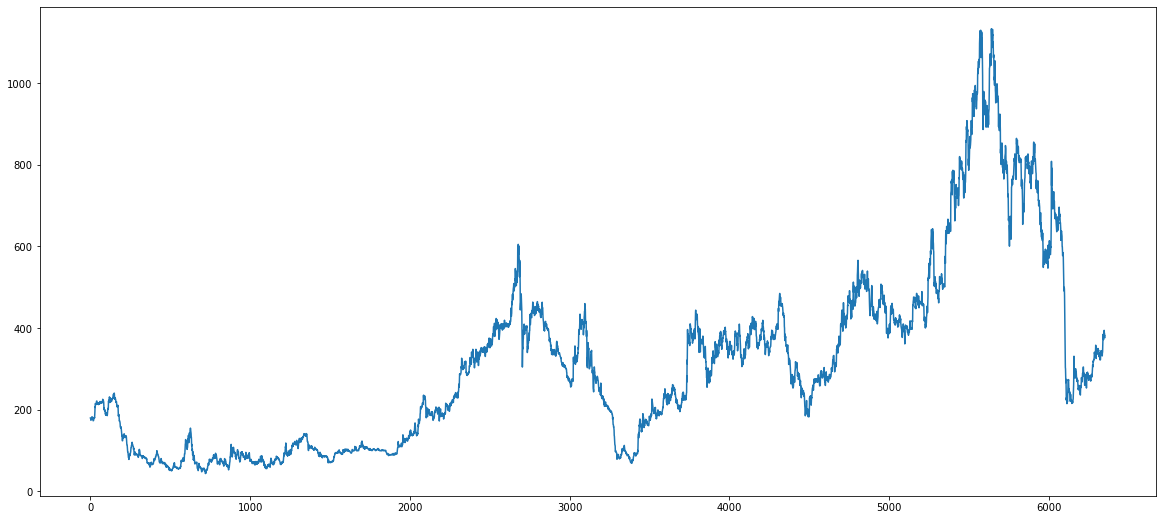

In [8]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [9]:
#columns for x and y
x  = df[['Open','High','Low','Volume']]
y = df['Close']

In [10]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume']] = scaler.fit_transform(df[['Open','High','Low','Volume']])
df.head()

,Open,High,Low,Volume,Close
0,0.120632,0.121207,0.124045,0.000020,179.966660
1,0.123063,0.121508,0.125592,0.000171,180.000000
2,0.123063,0.121207,0.126520,0.000048,180.000000
3,0.123063,0.121207,0.126520,0.000007,174.333328
4,0.120328,0.118497,0.121260,0.000048,176.166672


In [11]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4741, 4)
(1581, 4)
(4741,)
(1581,)


---
# Random Forest

In [12]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [13]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
1975,128.100006,128.064001,0.036005
6074,643.400024,640.579494,2.820530
4438,283.250000,295.946501,12.696501
6254,282.500000,274.378500,8.121500
106,187.966660,190.409831,2.443171
5126,388.850006,394.712002,5.861996
1947,118.300003,111.840500,6.459503
5857,815.349976,807.454503,7.895473
2702,378.950012,408.358004,29.407992
5230,402.700012,407.613499,4.913487


In [14]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9974174211434169
Mean Absolute Error: 7.118632349060567
Mean Squared  Error: 131.617093740398
Root Mean Squared Error: 11.472449334836828
Loss: 7.118632349060567


---
# k-NN

In [15]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [16]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
1975,128.100006,170.525002,42.424995
6074,643.400024,415.699997,227.700027
4438,283.250000,554.500023,271.250023
6254,282.500000,297.149994,14.649994
106,187.966660,184.733330,3.233330
5126,388.850006,399.375000,10.524994
1947,118.300003,108.625000,9.675003
5857,815.349976,536.074997,279.274979
2702,378.950012,372.275009,6.675003
5230,402.700012,387.949997,14.750015


In [17]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [18]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.4981734592818541
Mean Absolute Error: 97.87970671948135
Mean Squared  Error: 25574.80507623533
Root Mean Squared Error: 159.92124648162084
Loss: 97.87970671948135


---
# Decision Tree

In [19]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [20]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
1975,128.100006,128.300003,0.199997
6074,643.400024,647.950012,4.549988
4438,283.250000,302.049988,18.799988
6254,282.500000,264.899994,17.600006
106,187.966660,188.000000,0.033340
5126,388.850006,392.649994,3.799988
1947,118.300003,108.800003,9.500000
5857,815.349976,819.799988,4.450012
2702,378.950012,409.200012,30.250000
5230,402.700012,419.000000,16.299988


In [21]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.995323458613901
Mean Absolute Error: 9.587160043643264
Mean Squared  Error: 238.33262029001145
Root Mean Squared Error: 15.438025142161527
Loss: 9.587160043643264


---
# Linear Regression

In [22]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [23]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-4.34533381e-01  6.70021957e-01  7.64353688e-01  9.42407672e-07]
-0.1825002337545243


In [24]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
1975,128.100006,127.370446,0.729560
6074,643.400024,648.669669,5.269645
4438,283.250000,296.389780,13.139780
6254,282.500000,281.081094,1.418906
106,187.966660,184.576790,3.389870
5126,388.850006,393.269578,4.419572
1947,118.300003,113.570477,4.729526
5857,815.349976,817.847506,2.497530
2702,378.950012,416.660620,37.710608
5230,402.700012,406.967910,4.267898


In [25]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.998080895213563
Mean Absolute Error: 6.264550709328863
Mean Squared  Error: 97.80417505171815
Root Mean Squared Error: 9.889599337269338
Loss: 6.264550709328863
